In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# import data
my_df = pd.read_csv('data/sample_data_classification.csv')
my_df.head()

,output,input1,input2,input3
0,1,534,536,466
1,0,264,103,244
2,0,272,339,609
3,1,416,444,330
4,1,520,464,104


In [3]:
# split data into input and output variables
X = my_df.drop(['output'], axis = 1)
y = my_df['output']

In [4]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [8]:
# instantiate model object
clf = DecisionTreeClassifier()

In [9]:
# train model
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
# assess model accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.55

In [13]:
# demonstration of overfitting
y_pred_training = clf.predict(X_train)
accuracy_overfit = accuracy_score(y_train, y_pred_training)

accuracy_overfit

1.0

[Text(0.4375, 0.9375, 'input1 <= 455.0\ngini = 0.499\nsamples = 80\nvalue = [42, 38]'),
 Text(0.1875, 0.8125, 'input3 <= 112.5\ngini = 0.308\nsamples = 42\nvalue = [34, 8]'),
 Text(0.125, 0.6875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.25, 0.6875, 'input1 <= 157.0\ngini = 0.255\nsamples = 40\nvalue = [34, 6]'),
 Text(0.1875, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3125, 0.5625, 'input3 <= 750.5\ngini = 0.224\nsamples = 39\nvalue = [34, 5]'),
 Text(0.25, 0.4375, 'input2 <= 440.0\ngini = 0.188\nsamples = 38\nvalue = [34, 4]'),
 Text(0.125, 0.3125, 'input3 <= 536.0\ngini = 0.117\nsamples = 32\nvalue = [30, 2]'),
 Text(0.0625, 0.1875, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.1875, 0.1875, 'input3 <= 592.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.125, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.25, 0.0625, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.375, 0.3125, 'input3 <= 344.5\ngini = 0.444\nsamples = 6\nval

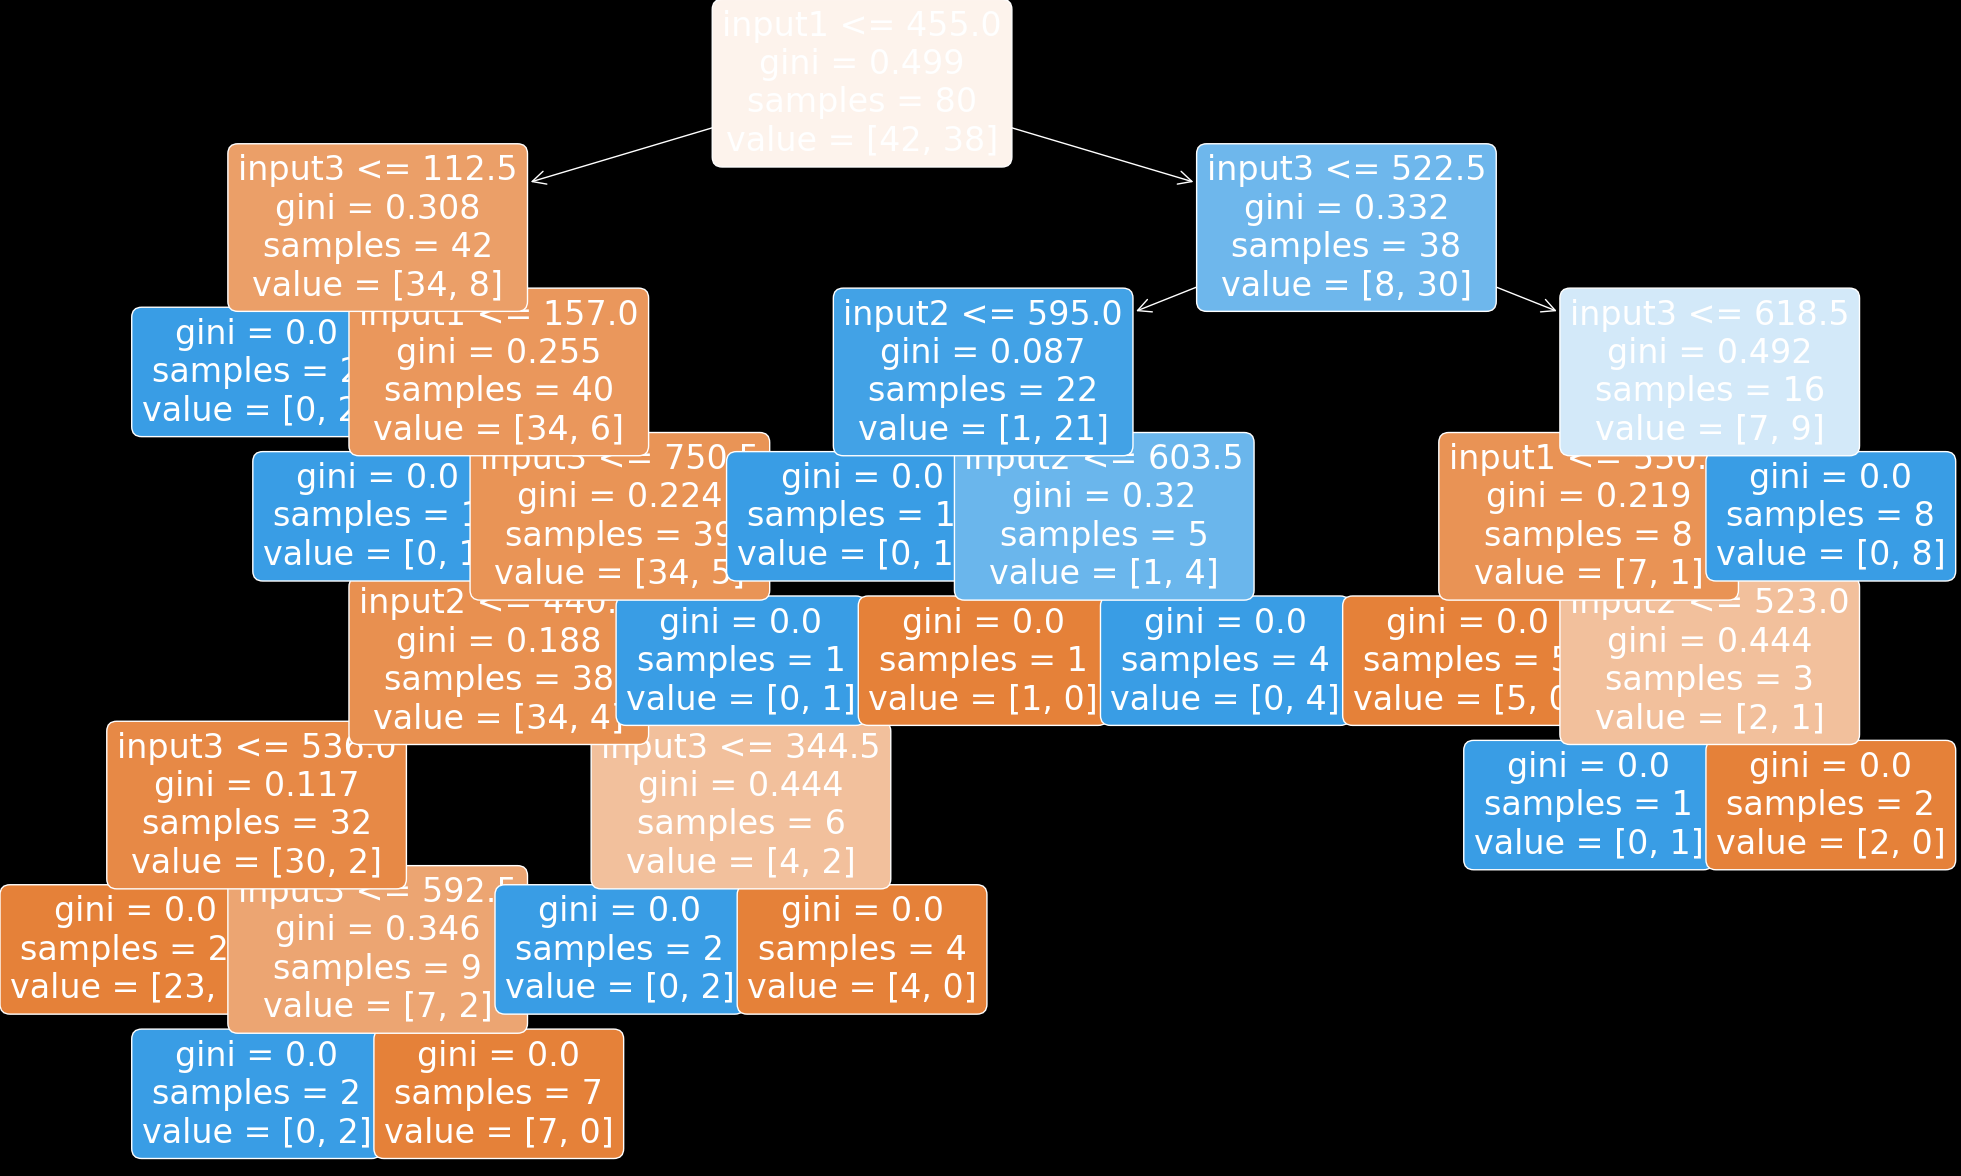

In [18]:
# plot decission tree
plt.figure(figsize = (25, 15))
tree = plot_tree(
    clf,
    feature_names = X.columns,
    filled = True,
    rounded = True,
    fontsize = 24
)

tree

Without parameters to specificy splitting and stopping criteria, the model created leaf nodes with very small samples and this model is overfitted. Splitting and stopping will be gone into more depth in the advanced module, but we can add a minimum size parameter to the regressor object to see the difference.  

In [19]:
# instantiate model object with minimum leaf node size
clf_min = DecisionTreeClassifier(min_samples_leaf = 7)

In [20]:
# train model
clf_min.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=7)

In [21]:
# assess model accuracy
y_pred_min = clf.predict(X_test)
accuracy_min = accuracy_score(y_test, y_pred)

accuracy_min

0.55

[Text(0.5, 0.9, 'input1 <= 455.0\ngini = 0.499\nsamples = 80\nvalue = [42, 38]'),
 Text(0.3076923076923077, 0.7, 'input2 <= 438.5\ngini = 0.308\nsamples = 42\nvalue = [34, 8]'),
 Text(0.23076923076923078, 0.5, 'input3 <= 504.5\ngini = 0.208\nsamples = 34\nvalue = [30, 4]'),
 Text(0.15384615384615385, 0.3, 'input1 <= 380.5\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.38461538461538464, 0.5, 'gini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.6923076923076923, 0.7, 'input3 <= 522.5\ngini = 0.332\nsamples = 38\nvalue = [8, 30]'),
 Text(0.5384615384615384, 0.5, 'input2 <= 577.5\ngini = 0.087\nsamples = 22\nvalue = [1, 21]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.6153846153846154, 0.3, 'gini = 0.245\nsamp

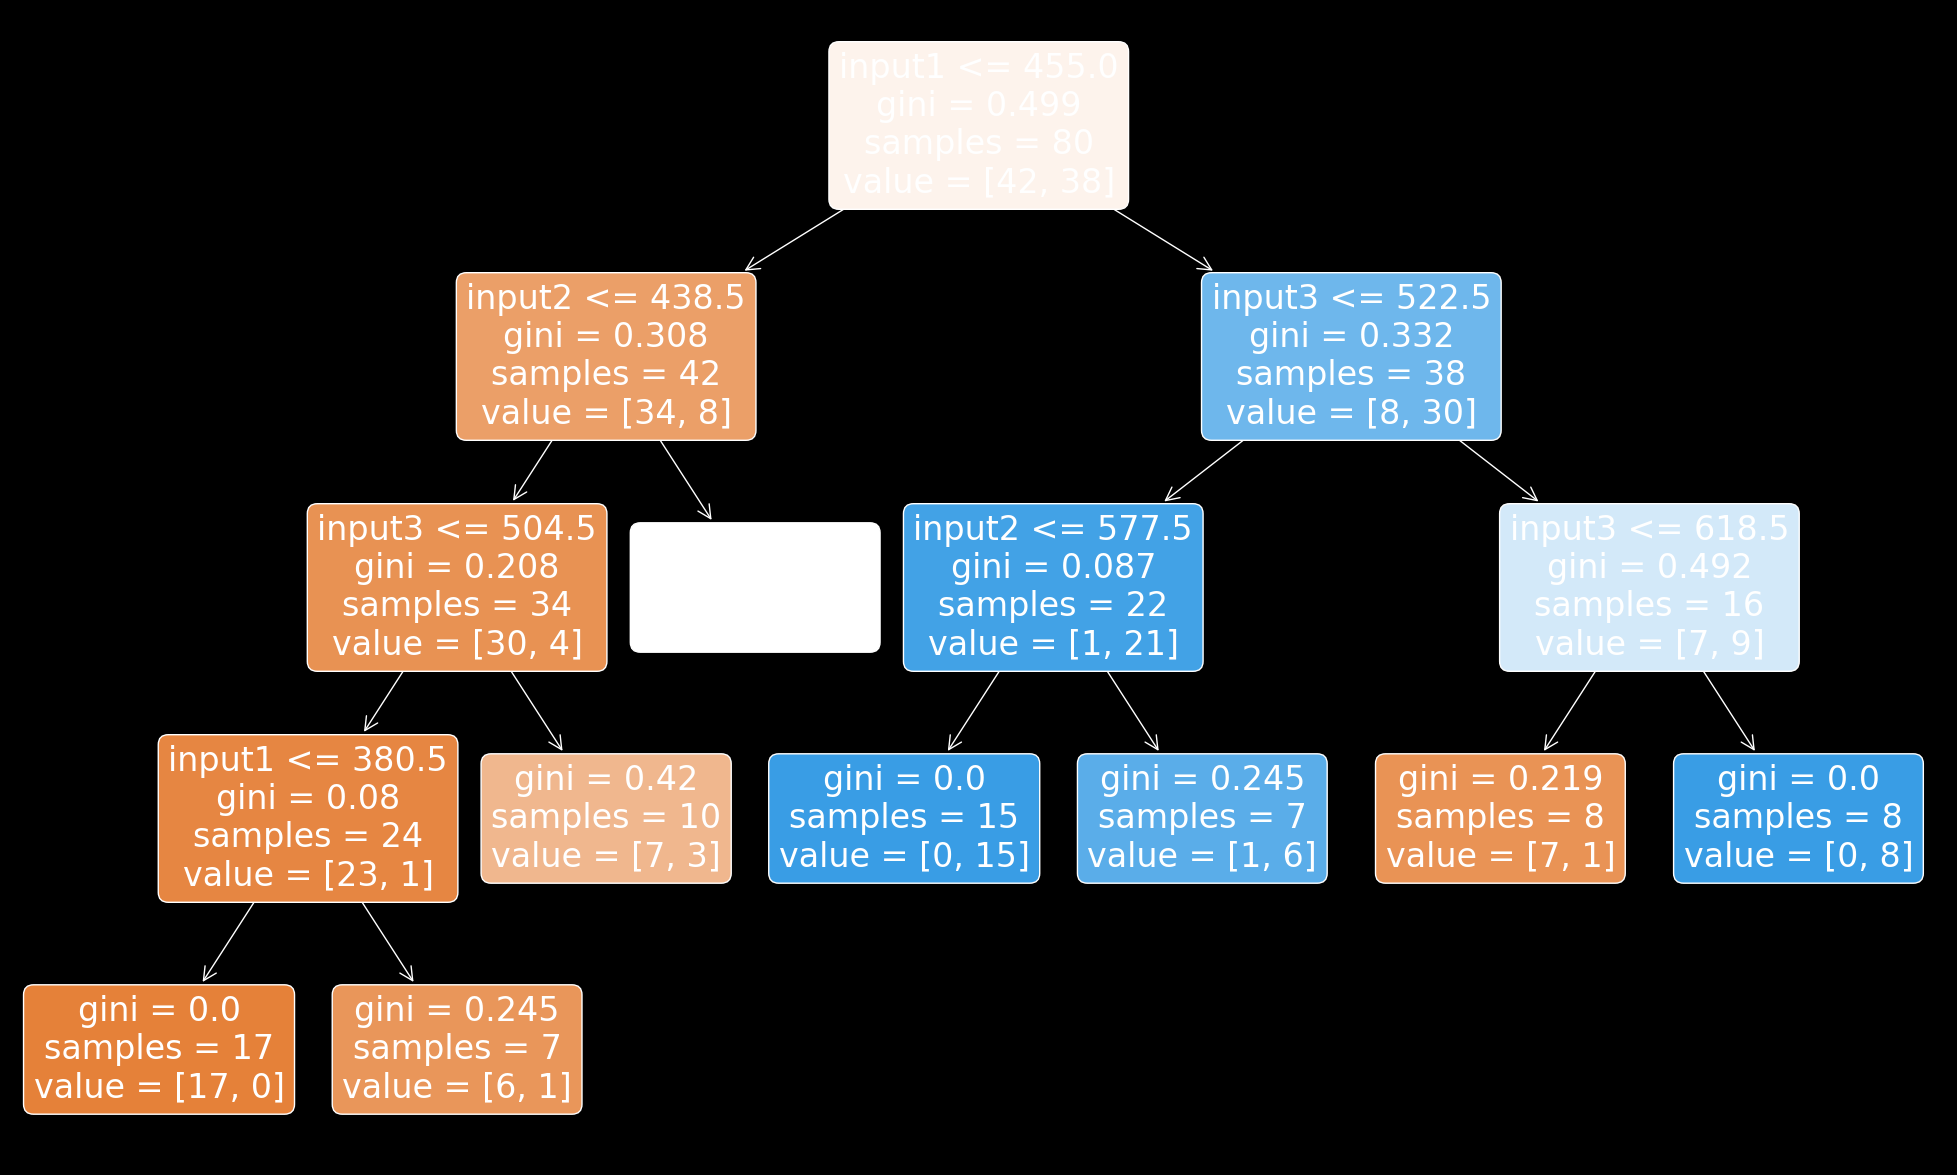

In [22]:
# plot decission tree
plt.figure(figsize = (25, 15))
tree = plot_tree(
    clf_min,
    feature_names = X.columns,
    filled = True,
    rounded = True,
    fontsize = 24
)

tree